In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

import gc
import warnings
warnings.filterwarnings('ignore')

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 1. 회원정보

In [3]:
df1 = pd.read_parquet('../open/train/1.회원정보/201807_train_회원정보.parquet')
df2 = pd.read_parquet('../open/train/1.회원정보/201808_train_회원정보.parquet')
df3 = pd.read_parquet('../open/train/1.회원정보/201809_train_회원정보.parquet')
df4 = pd.read_parquet('../open/train/1.회원정보/201810_train_회원정보.parquet')
df5 = pd.read_parquet('../open/train/1.회원정보/201811_train_회원정보.parquet')
df6 = pd.read_parquet('../open/train/1.회원정보/201812_train_회원정보.parquet')

In [4]:
# 담을 리스트 리스트
all_df = []

# df1~6 담아주기
all_df.append(df1)
all_df.append(df2)
all_df.append(df3)
all_df.append(df4)
all_df.append(df5)
all_df.append(df6)

# merge
merged_df = pd.concat(all_df, ignore_index=True)

print(type(merged_df))
print(merged_df.shape)

<class 'pandas.core.frame.DataFrame'>
(2400000, 78)


In [5]:
# 제거할 컬럼들

# 결측치
ext0 = ['가입통신회사코드', 
        '직장시도명', 
        '_1순위신용체크구분', 
        '_2순위신용체크구분', 
        '최종유효년월_신용_이용가능']

# 값이 일정한 컬럼 list
ext1 = ['이용카드수_체크_가족', 
        '이용금액_R3M_체크_가족', 
        '연회비할인카드수_B0M', 
        '할인금액_기본연회비_B0M', 
        '할인금액_제휴연회비_B0M', 
        '상품관련면제카드수_B0M', 
        '임직원면제카드수_B0M', 
        '우수회원면제카드수_B0M', 
        '기타면제카드수_B0M']

# 중복 컬럼 list
ext2 = ['이용금액_R3M_체크_가족', 
        '연회비할인카드수_B0M', 
        '할인금액_기본연회비_B0M', 
        '할인금액_제휴연회비_B0M', 
        '연회비할인카드수_B0M', 
        '할인금액_기본연회비_B0M', 
        '할인금액_제휴연회비_B0M', 
        '할인금액_기본연회비_B0M', 
        '할인금액_제휴연회비_B0M', 
        '청구금액_기본연회비_B0M', 
        '청구금액_제휴연회비_B0M',
        '할인금액_제휴연회비_B0M',
        '임직원면제카드수_B0M', 
        '우수회원면제카드수_B0M', 
        '기타면제카드수_B0M', 
        '우수회원면제카드수_B0M', 
        '기타면제카드수_B0M', 
        '기타면제카드수_B0M']

drop = list(set(ext0+ext1+ext2))
merged_df1 = merged_df.drop(columns=drop, axis=1)
print("===컬럼 제거 완료!===")
print(f"- 제거한 컬럼수 : {len(drop)}\n- 남은 컬럼 수 : {len(merged_df1.columns)} ")

===컬럼 제거 완료!===
- 제거한 컬럼수 : 16
- 남은 컬럼 수 : 62 


# Segment 분포

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

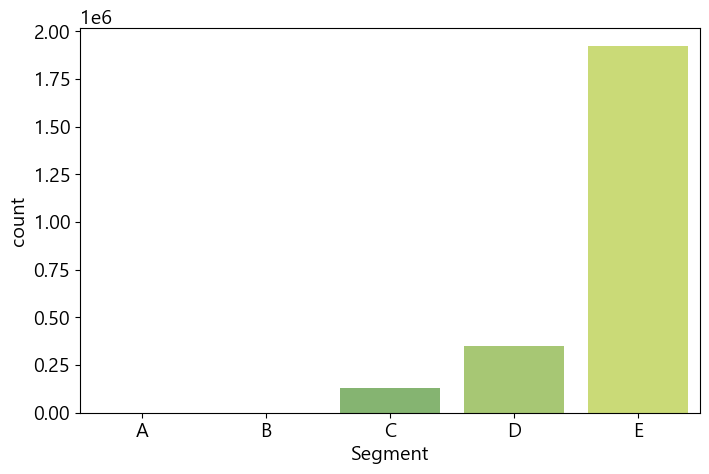

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df1, x='Segment', order=sorted(merged_df1['Segment'].value_counts().index), palette = 'summer')
merged_df1['Segment'].value_counts()

In [8]:
numerical_cols = merged_df1.select_dtypes(include='int64').columns.tolist()
print('== 숫자형 ==')
print(numerical_cols)

categorical_cols = merged_df1.select_dtypes(include=['object', 'category']).columns.tolist()
print('== 범주형 ==')
print(categorical_cols)

== 숫자형 ==
['기준년월', '남녀구분코드', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용', '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '_1순위카드이용금액', '_1순위카드이용건수', '_2순위카드이용금액', '_2순위카드이용건수', '보유여부_해외겸용_본인', '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '기본연회비_B0M', '제휴연회비_B0M', '카드신청건수', '최종카드발급경과월']
== 범주형 ==
['ID', '연령', 'Segment', '거주시도명', '연회비발생카드수_B0M', 'Life_Stage']


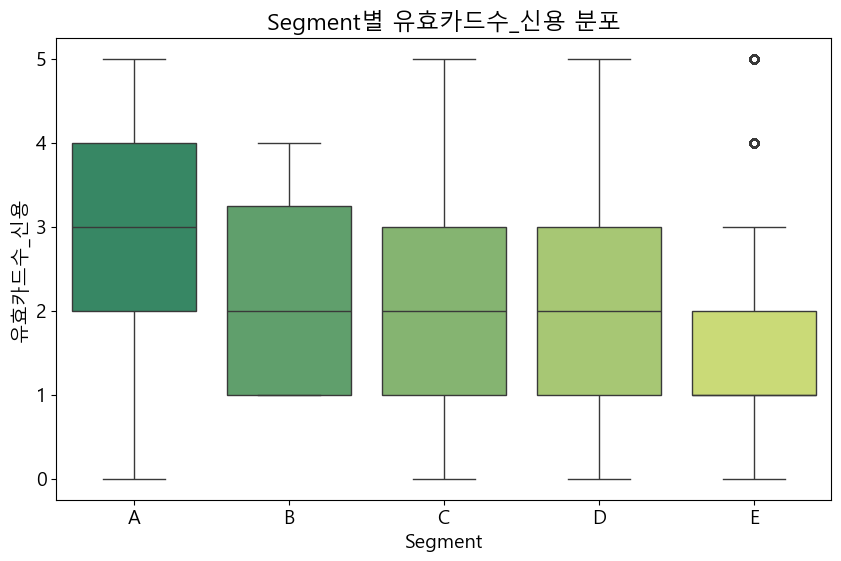

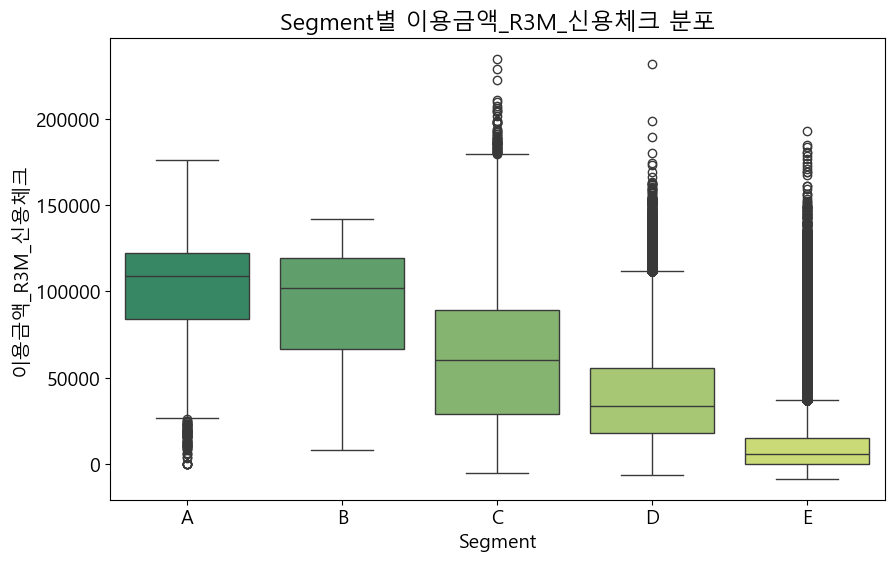

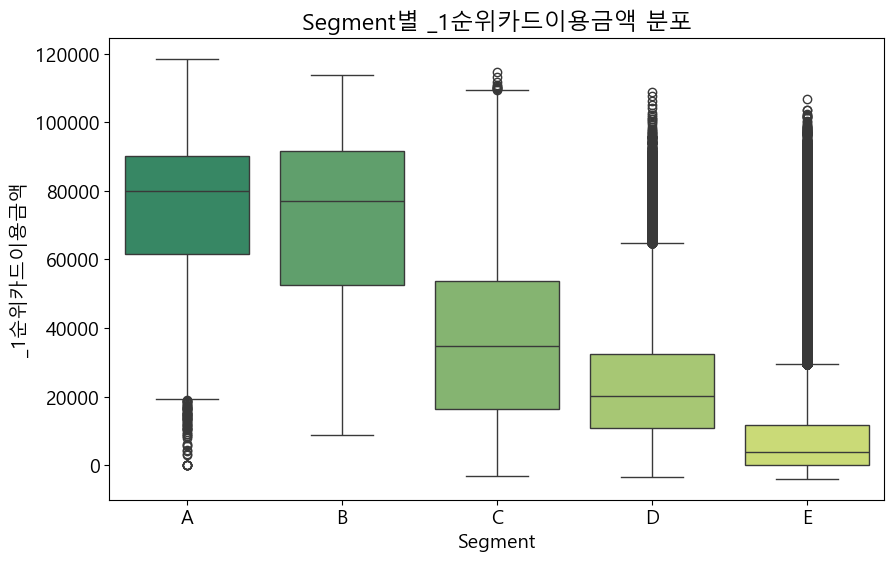

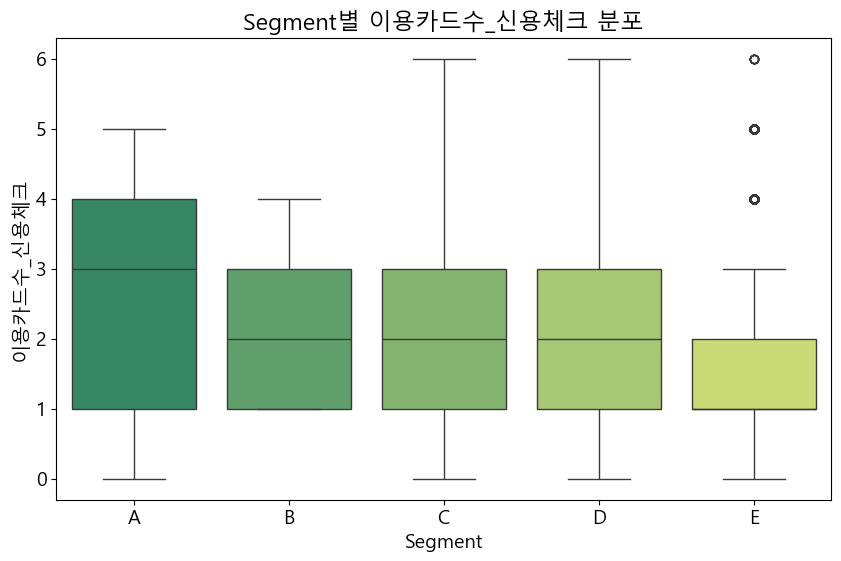

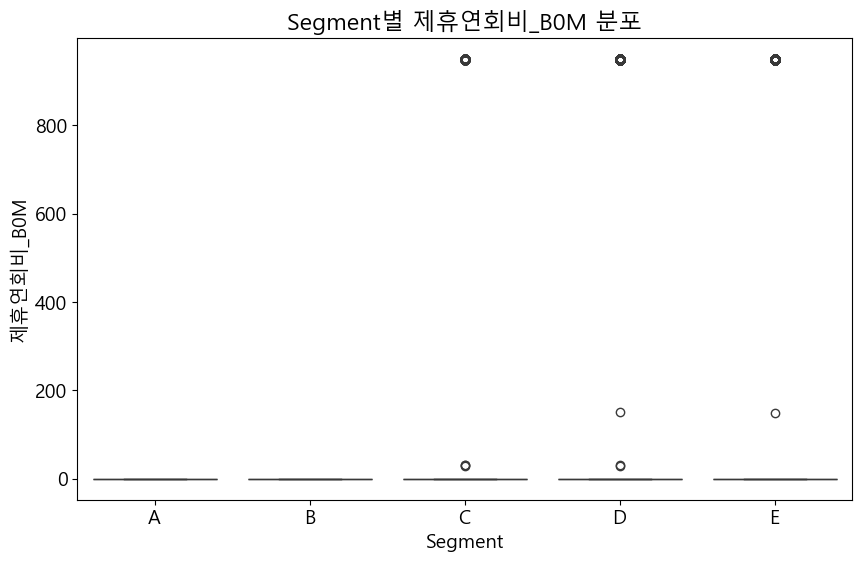

In [9]:
numerical_features_to_analyze = ['유효카드수_신용', '이용금액_R3M_신용체크', '_1순위카드이용금액', '이용카드수_신용체크', '제휴연회비_B0M']

for col in numerical_features_to_analyze:
    plt.figure(figsize=(10, 6))
    # Segment의 순서를 지정하여 시각화 일관성 유지
    sns.boxplot(data=merged_df1, x='Segment', y=col, order=sorted(merged_df1['Segment'].unique()), palette='summer')
    plt.title(f'Segment별 {col} 분포')
    plt.xlabel('Segment')
    plt.ylabel(col)
    plt.show()


--- Segment별 '연령' 비율 ---
연령            20대        30대        40대        50대        60대     70대이상
Segment                                                                
A        0.617284   8.024691  37.037037  38.888889  11.111111  4.320988
B        4.166667  29.166667  33.333333  33.333333   0.000000  0.000000
C        3.240066  25.280978  37.926170  23.263579   7.749824  2.539384
D        7.440686  29.279984  33.157524  20.279348   7.646847  2.195612
E        8.415381  23.803310  29.580261  23.173671  10.940807  4.086570


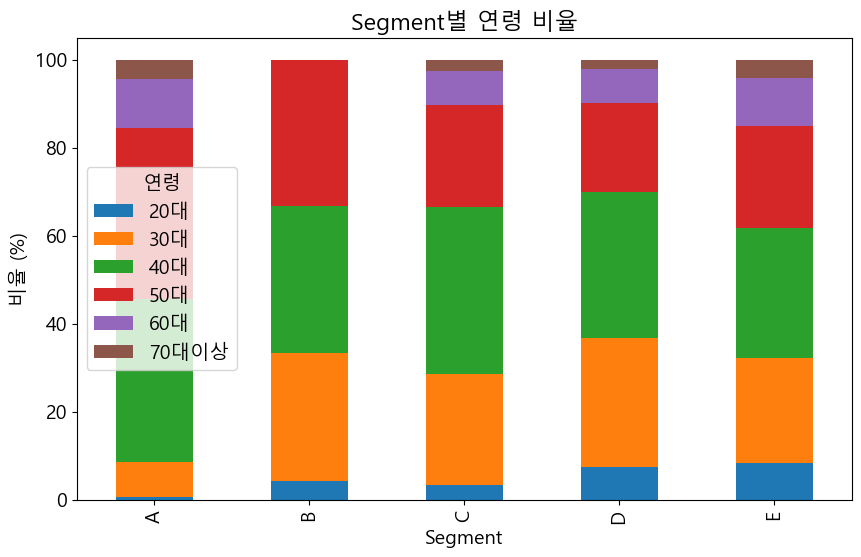


--- Segment별 '거주시도명' 비율 ---
거주시도명          강원         경기        경남        경북        광주        대구  \
Segment                                                                
A        0.617284  43.518519  1.851852  2.160494  1.543210  0.514403   
B        0.000000  12.500000  8.333333  4.166667  0.000000  0.000000   
C        0.287640  34.418058  2.795674  2.805079  1.224234  2.482169   
D        0.494786  29.871264  3.707744  3.020255  1.335750  2.902858   
E        0.523139  26.238052  4.146506  4.010453  1.582527  3.505472   

거주시도명          대전         부산         서울        세종        울산        인천  \
Segment                                                                 
A        2.674897   3.703704  29.629630  0.000000  3.909465  4.835391   
B        0.000000  12.500000  46.527778  0.000000  1.388889  2.777778   
C        5.245709   4.617133  30.626225  0.007054  2.823889  5.658751   
D        5.372492   4.853941  30.685599  0.007158  2.993340  6.331999   
E        6.103789   6.561217

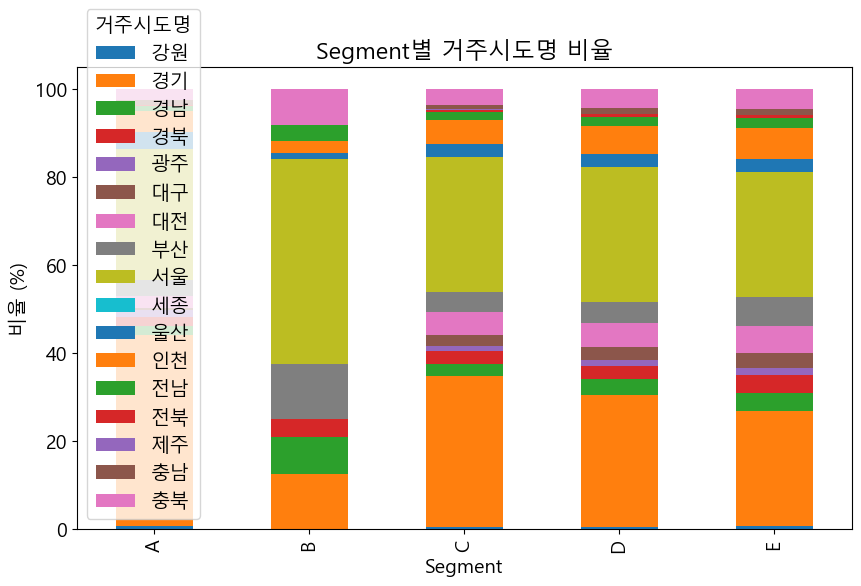


--- Segment별 '연회비발생카드수_B0M' 비율 ---
연회비발생카드수_B0M          0개      1개이상
Segment                           
A              99.897119  0.102881
B             100.000000  0.000000
C              99.611255  0.388745
D              99.810447  0.189553
E              99.791109  0.208891


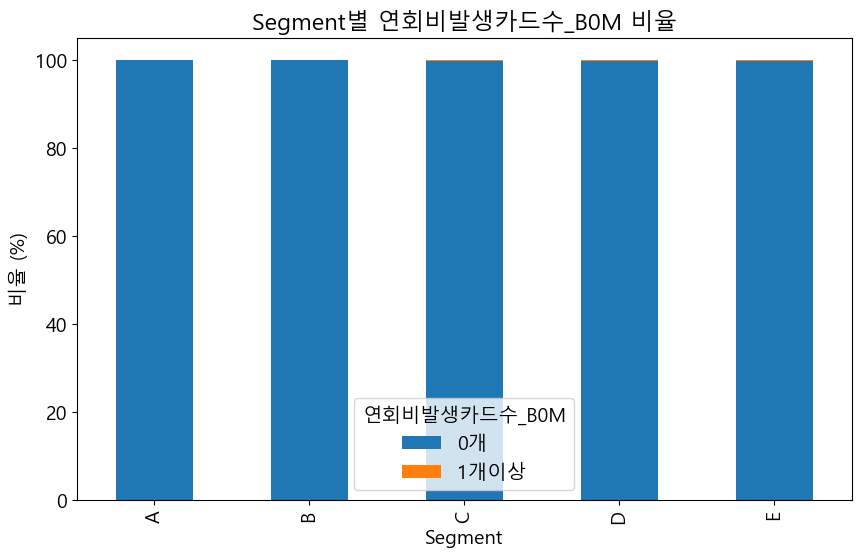


--- Segment별 'Life_Stage' 비율 ---
Life_Stage      가족구축기       노년생활        독신     자녀독립기    자녀성장(1)    자녀성장(2)  \
Segment                                                                      
A            0.617284   7.407407  0.617284  8.950617  32.098765  45.164609   
B            4.166667   0.000000  4.166667  4.166667  50.000000  29.166667   
C            7.651070   6.203464  1.179560  6.692531  41.272043  26.133710   
D           11.972787   6.287331  3.033140  6.289049  37.143299  22.829442   
E            9.926110  10.580099  4.241561  8.721980  31.885037  24.842876   

Life_Stage      자녀출산기  
Segment                
A            5.144033  
B            8.333333  
C           10.867623  
D           12.444952  
E            9.802336  


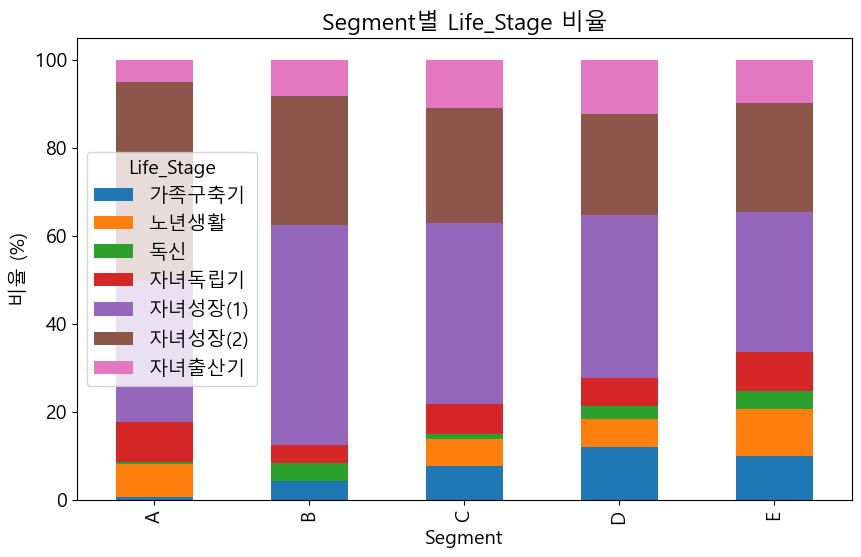

In [10]:
categorical_features_to_analyze = ['연령', '거주시도명', '연회비발생카드수_B0M', 'Life_Stage'] 

for col in categorical_features_to_analyze:
    # 교차표 (비율 계산)
    cross_tab = pd.crosstab(merged_df1['Segment'], merged_df1[col], normalize='index') * 100
    print(f"\n--- Segment별 '{col}' 비율 ---")
    print(cross_tab)

    # 시각화: 누적 막대 그래프
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Segment별 {col} 비율')
    plt.xlabel('Segment')
    plt.ylabel('비율 (%)')
    plt.legend(title=col)
    plt.show()

# 2. 신용정보

In [12]:
df1 = pd.read_parquet('../open/train/2.신용정보/201807_train_신용정보.parquet')
df2 = pd.read_parquet('../open/train/2.신용정보/201808_train_신용정보.parquet')
df3 = pd.read_parquet('../open/train/2.신용정보/201809_train_신용정보.parquet')
df4 = pd.read_parquet('../open/train/2.신용정보/201810_train_신용정보.parquet')
df5 = pd.read_parquet('../open/train/2.신용정보/201811_train_신용정보.parquet')
df6 = pd.read_parquet('../open/train/2.신용정보/201812_train_신용정보.parquet')

In [13]:
# 담을 리스트 리스트
all_df = []

# df1~6 담아주기
all_df.append(df1)
all_df.append(df2)
all_df.append(df3)
all_df.append(df4)
all_df.append(df5)
all_df.append(df6)

# merge
merged_df2 = pd.concat(all_df, ignore_index=True)

print(type(merged_df2))
print(merged_df2.shape)

<class 'pandas.core.frame.DataFrame'>
(2400000, 42)


In [14]:
# 제거할 컬럼들

# 결측치
ext0 = ['RV신청일자', 
        'RV전환가능여부']

# 값이 일정한 컬럼 list
ext1 = ['시장연체상환여부_R3M']

# 중복 컬럼 list
ext2 = []

drop = list(set(ext0+ext1+ext2))
merged_df2 = merged_df2.drop(columns=drop, axis=1)
print("===컬럼 제거 완료!===")
print(f"- 제거한 컬럼수 : {len(drop)}\n- 남은 컬럼 수 : {len(merged_df2.columns)} ")

===컬럼 제거 완료!===
- 제거한 컬럼수 : 3
- 남은 컬럼 수 : 39 


In [15]:
a1 = merged_df[['Segment','ID']]
merged_df2 = pd.merge(merged_df2, a1, on='ID', how='outer')

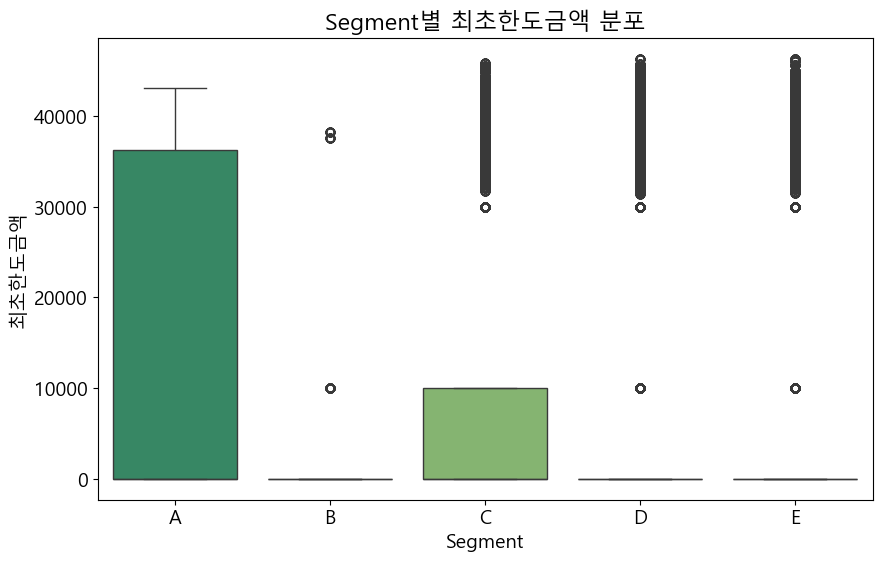

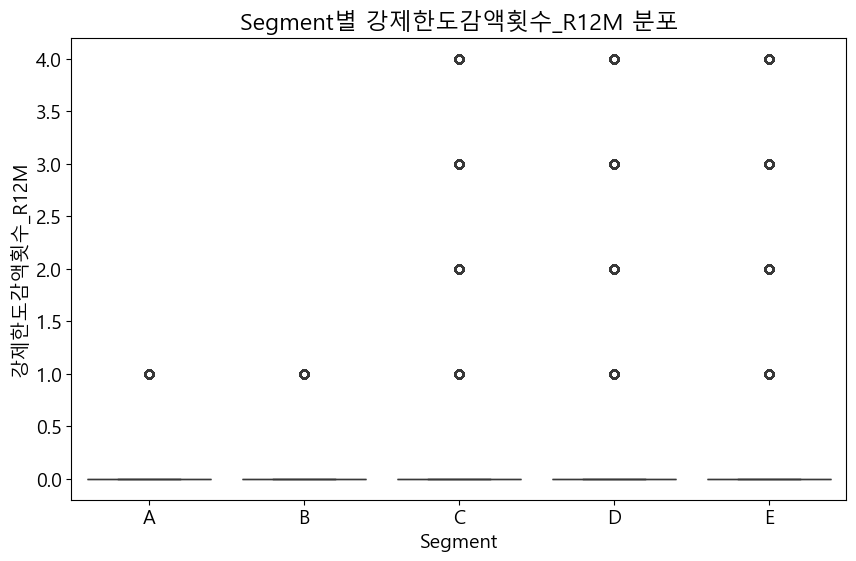

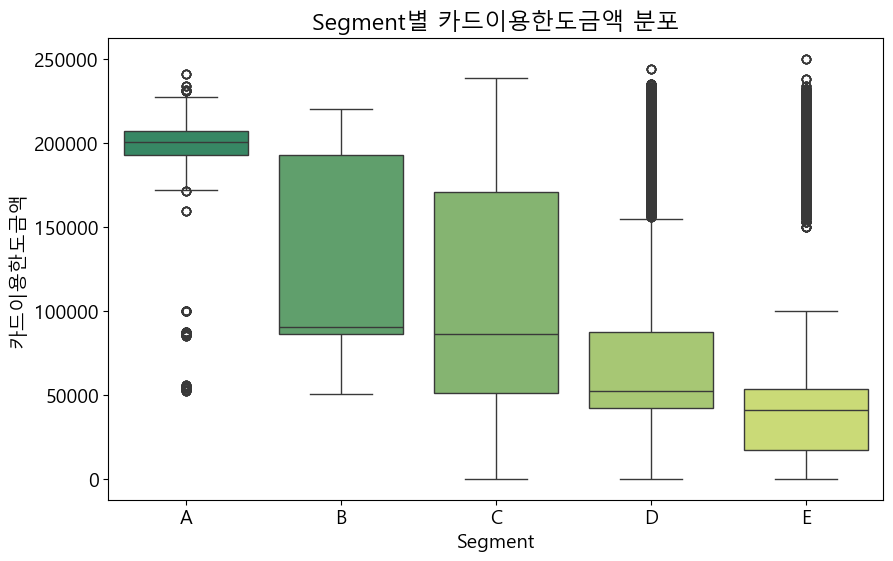

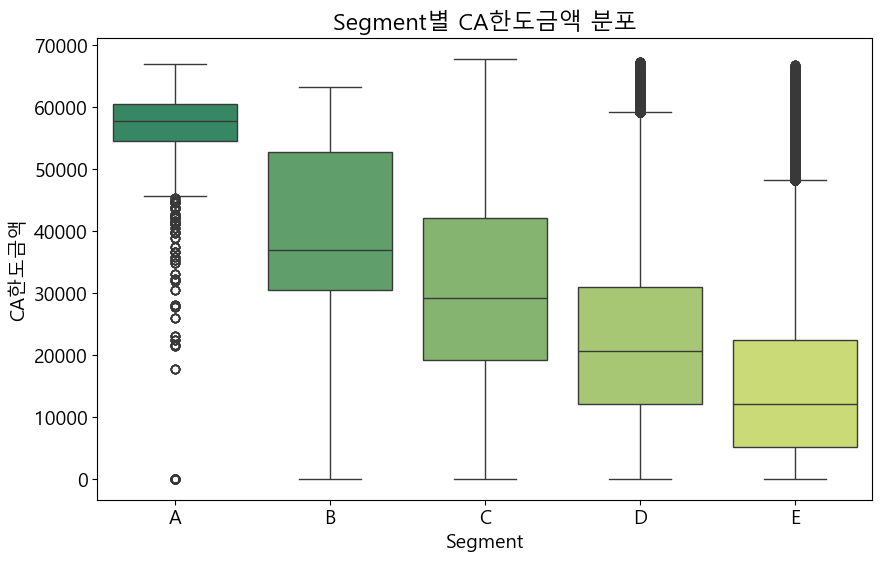

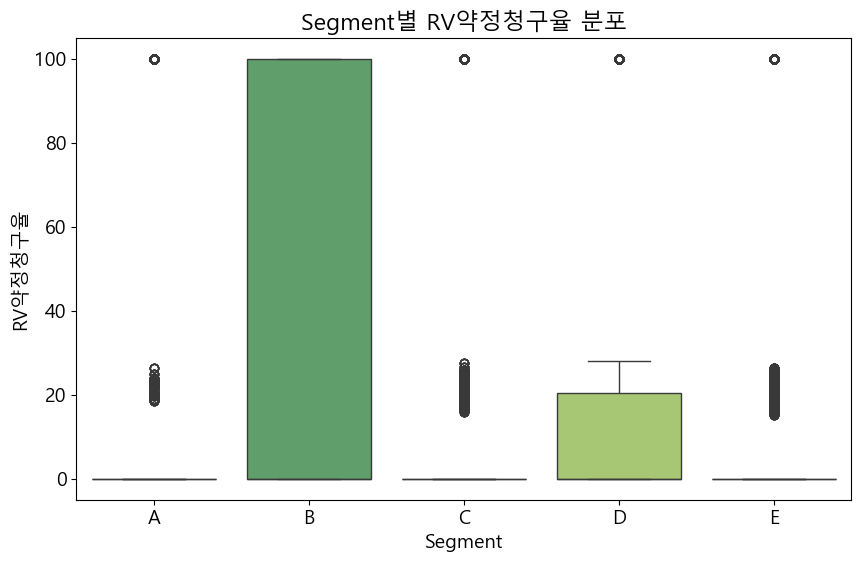

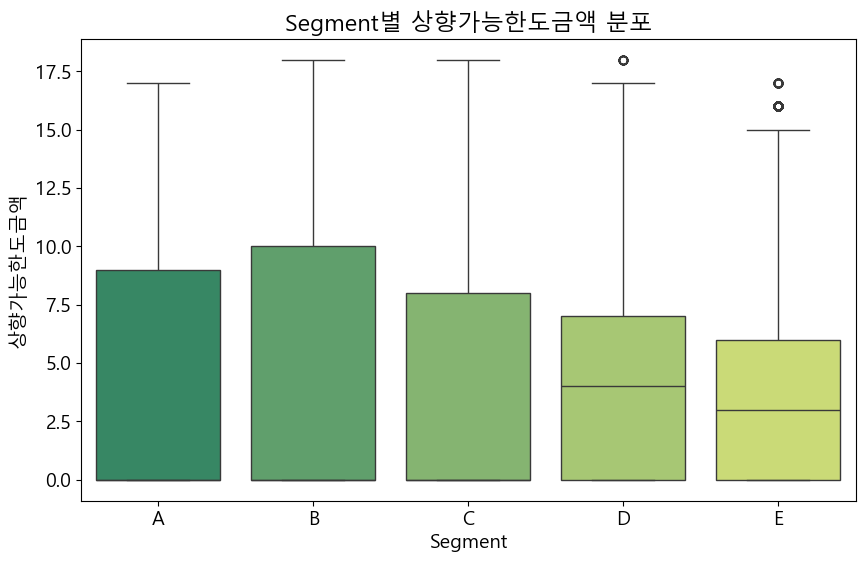

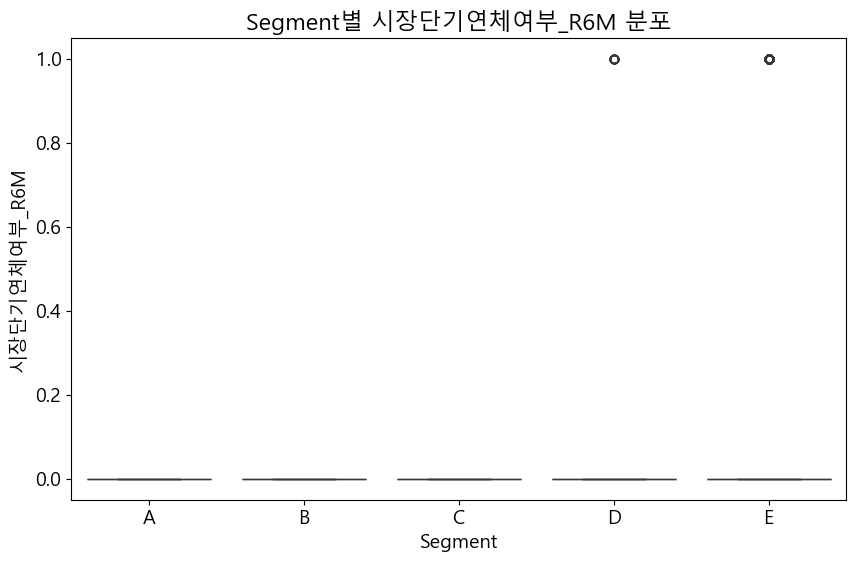

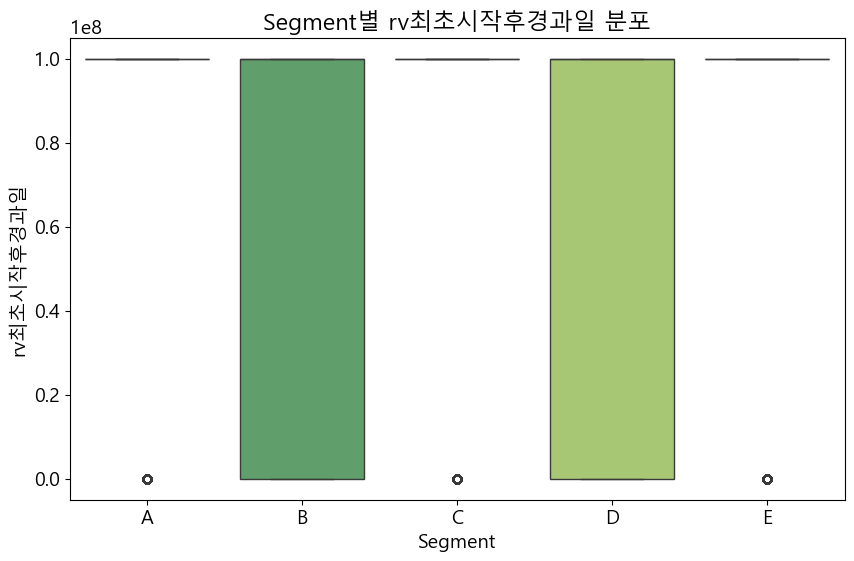

In [16]:
numerical_features_to_analyze = ['최초한도금액', '강제한도감액횟수_R12M', '카드이용한도금액', 'CA한도금액', 'RV약정청구율', '상향가능한도금액', '시장단기연체여부_R6M', 'rv최초시작후경과일']

for col in numerical_features_to_analyze:
    plt.figure(figsize=(10, 6))
    # Segment의 순서를 지정하여 시각화 일관성 유지
    sns.boxplot(data=merged_df2, x='Segment', y=col, order=sorted(merged_df2['Segment'].unique()), palette='summer')
    plt.title(f'Segment별 {col} 분포')
    plt.xlabel('Segment')
    plt.ylabel(col)
    plt.show()